# Download data

In [ ]:
# !gdown http://headkraken.gg/soft/Dan/LCB_data_snd_devided.zip
# !unzip -qq LCB_data_snd_devided.zip

In [ ]:
# !gdown http://headkraken.gg/soft/LCB_demos.zip
# !unzip -qq LCB_demos.zip

In [ ]:
# !gdown --id 13s0uq6eWU5bx3Ctik5Wy4baN-wBctoOu
# !unzip -q LCB_added_rep.zip

In [ ]:
# !gdown --id 1BdXSmAlogOrJyyoQ9SQ1HzOZpTvCBrw-

In [12]:
# %pip install pydub
! pip install pytorch-lightning


  Using cached pytorch_lightning-1.6.3-py3-none-any.whl (584 kB)
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
  Using cached pyDeprecate-0.3.2-py3-none-any.whl (10 kB)
  Using cached aiohttp-3.8.1-cp39-cp39-win_amd64.whl (554 kB)
  Using cached Werkzeug-2.1.2-py3-none-any.whl (224 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached Markdown-3.3.7-py3-none-any.whl (97 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
  Using cached yarl-1.7.2-cp39-cp39-win_amd64.whl (122 kB)
  Using cached froz

# Prepare data

In [1]:
import warnings
warnings.filterwarnings("ignore")

from codes.data_prep import *

In [2]:
file_path='.\\LCB_added'
path_to_audio='.\\LCB_data_snd_devided'
path_to_splitted_audio='.\\LCB_audio'

In [10]:
train_dataloader,val_dataloader = get_dataloader(file_path=file_path,
                                                 path_to_audio=path_to_audio,
                                                 path_to_splitted_audio=path_to_splitted_audio,
                                                 test_size=0.2,
                                                 use_game_context=False,
                                                 batch_size=32)

.\LCB_audio exists; skip splitting
Emotion statistic:
1 - 7321     интерес
2 - 657     радость
3 - 280     удивление
4 - 295     горе
5 - 822     гнев
6 - 20     отвращение
7 - 289     презрение
8 - 337     страх
9 - 10     стыд
10 - 155     вина

Prepare train and val lists
It took:  10.33  minutes
train size:  8148
val size:  2037
pff

Prepate train dataset
Prepate val dataset


In [24]:
# bttch = next(iter(train_dataloader))
audio = bttch[0][0].numpy()
audio

array([-0.06509399, -0.04873657, -0.03926086, ...,  0.        ,
        0.00184631,  0.00379944], dtype=float32)

In [ ]:
next(iter(train_dataloader))[1].shape

In [40]:
def calculate_all_windows(audio, logarithmic=True):
    
    truncate_size = (len(audio) - 512) % 256
    print(len(audio))
    print(truncate_size)
    audio = audio[:len(audio) - truncate_size]
    print(len(audio))
    sampling_rate = 22050
    nshape = (512, (len(audio) - 512) // 256 + 1)
    nhops = (audio.strides[0], audio.strides[0] * 256)
    
    windows = np.lib.stride_tricks.as_strided(audio, 
                                              shape=nshape, 
                                              strides=nhops)
    
    assert np.all(windows[:, 1] == audio[256:(256 + 512)])
    weighting = np.hanning(512)[:, None]
    yf = np.fft.rfft(windows * weighting, axis=0)
    yf = np.abs(yf)**2

    scaling_factor = np.sum(weighting**2) * sampling_rate
    yf[1:-1, :] *= 2. / scaling_factor 
    yf[(0,-1), :] /= scaling_factor

    xf = float(sampling_rate) / 512 * np.arange(yf.shape[0])

    indices = np.where(xf <= sampling_rate // 2)[0][-1] + 1
    return np.log(yf[:indices, :] + 1e-16), xf

_yf, _xf = calculate_all_windows(audio)

66150
102
66048


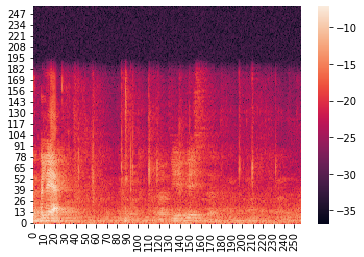

In [42]:
import seaborn as sns 

ax = sns.heatmap(_yf)
ax.invert_yaxis()

In [43]:
_xf

array([    0.        ,    43.06640625,    86.1328125 ,   129.19921875,
         172.265625  ,   215.33203125,   258.3984375 ,   301.46484375,
         344.53125   ,   387.59765625,   430.6640625 ,   473.73046875,
         516.796875  ,   559.86328125,   602.9296875 ,   645.99609375,
         689.0625    ,   732.12890625,   775.1953125 ,   818.26171875,
         861.328125  ,   904.39453125,   947.4609375 ,   990.52734375,
        1033.59375   ,  1076.66015625,  1119.7265625 ,  1162.79296875,
        1205.859375  ,  1248.92578125,  1291.9921875 ,  1335.05859375,
        1378.125     ,  1421.19140625,  1464.2578125 ,  1507.32421875,
        1550.390625  ,  1593.45703125,  1636.5234375 ,  1679.58984375,
        1722.65625   ,  1765.72265625,  1808.7890625 ,  1851.85546875,
        1894.921875  ,  1937.98828125,  1981.0546875 ,  2024.12109375,
        2067.1875    ,  2110.25390625,  2153.3203125 ,  2196.38671875,
        2239.453125  ,  2282.51953125,  2325.5859375 ,  2368.65234375,
      

In [ ]:
#for ML methods

x_train,y_train,x_test,y_test = get_train_test(file_path=file_path,
                                                 path_to_audio=path_to_audio,
                                                 path_to_splitted_audio=path_to_splitted_audio,
                                                 test_size=0.2,
                                                 use_game_context=False)

In [ ]:
x_train.shape,y_train.shape